## Biweekly Report
## Thoon Nguyen
### EDA on CIFAR-10 (Dataset)

For this part of my biweekly report I will be learning about PyTorch by using it for exploratory data analysis of the CIFAR-10 dataset. The CIFAR-10 dataset, created by the Canadian Institute for Advanced Research, contains 60,000 color images. Each image is 32x32 with 3 color channels. There are 10 different classes with each class having 6,000 images. Each image includes real-world images with various orientation and background. I've choosen this dataset because although it is small, it has a large variety of colored images to work with.

In [64]:
# Import Libraries
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

I will be only using a few libraries in this report. I've use Matlab for coding in the past so I am already familiar with `matplotlib.pylot` and `numpy`. I am mainly interested in the tools in the `torch` and `torchvision` libraries. `Torchvision` contains the CIFAR dataset that I will be working with as well as other properly dataset such as MNIST and ImageNet. It also includes `transfroms` which I will be using for image preprocessing and augmenting.

In [65]:
# Step 1: Load an Image Dataset (e.g., CIFAR-10)
transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True)


Files already downloaded and verified


Here we download the training set for the CIFAR-10 dataset and do so preprocesing. The images are downloaded and coverted to numerical data in a tensor. I can also do other preprocessing here if needed such as resizeing or normalizing and standardizing the data. `dataloader` is used later in the code to load images in random batches.


In [66]:
# Step 2: Inspect Dataset Properties
print("Dataset size:", len(dataset))
classes = dataset.classes
print("Classes:", classes)
print(f"Shape of one sample: {dataset[0][0].shape}, {dataset[0][1]}")


Dataset size: 50000
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Shape of one sample: torch.Size([3, 32, 32]), 6


This is code to get the size of the dataset, names of the classes, and the shape of a sample image. The '6' indicates the class of the image. In this example, the image is of a 32x32 3 color channel of a dog.

In [67]:
# Step 3: Visualize Images
def show_images(images, labels, classes):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
    for img, label, ax in zip(images, labels, axes):
        img = img.permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
        ax.imshow(img)
        ax.set_title(classes[label])
        ax.axis('off')
    plt.show()


In [68]:
# Get a batch of data
dataiter = iter(dataloader)
images, labels = next(dataiter)

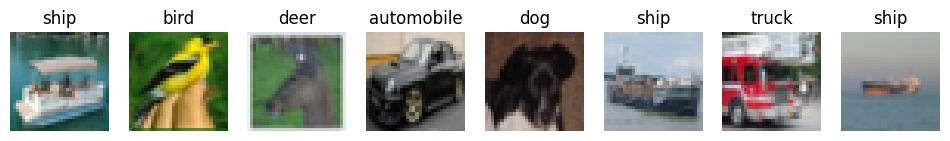

In [69]:
# Show first 8 images
show_images(images[:8], labels[:8], classes)


These sets of code displays 8 (or how many you choose) images.

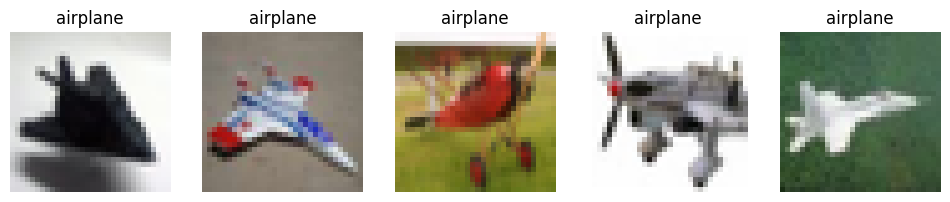

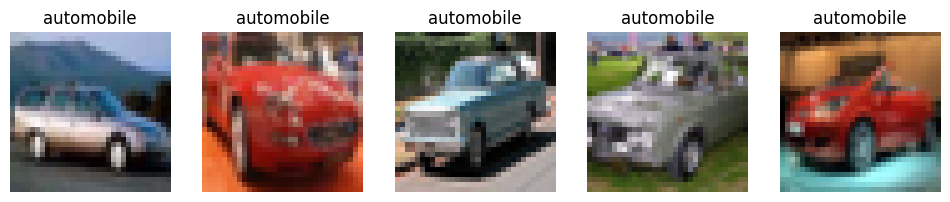

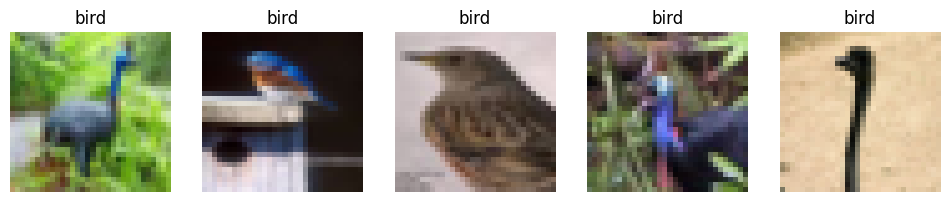

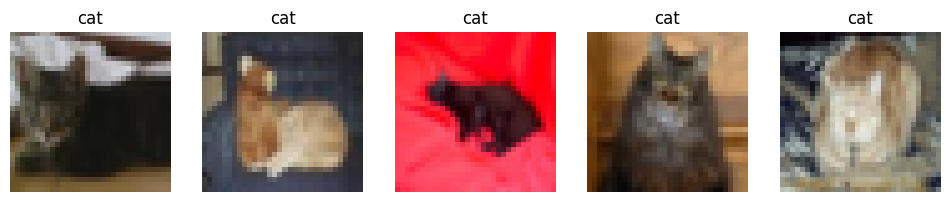

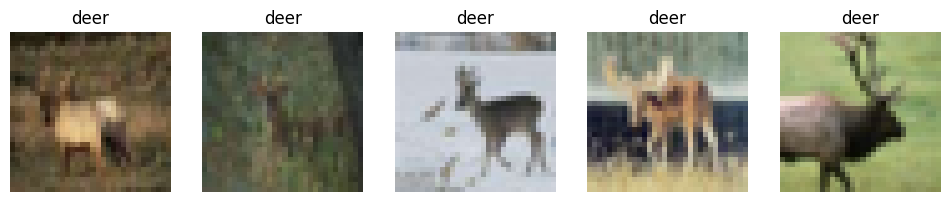

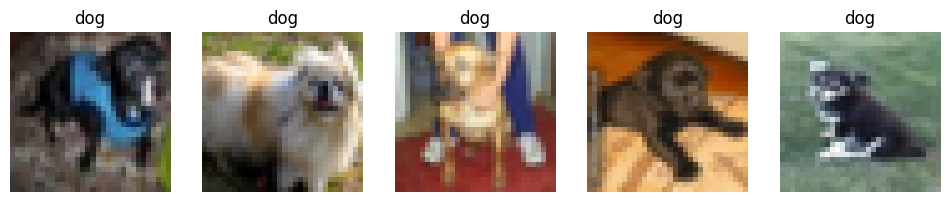

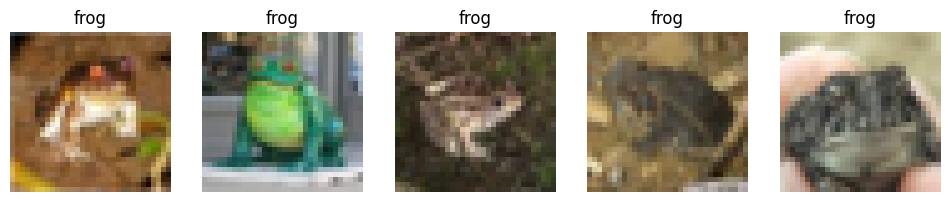

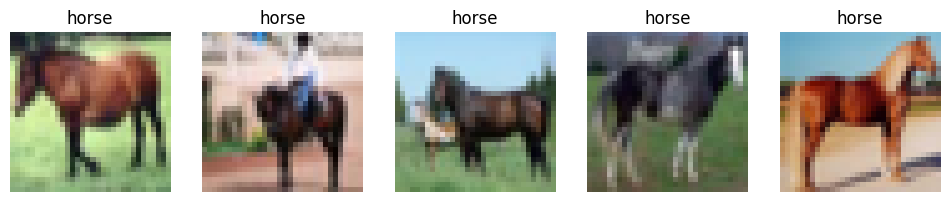

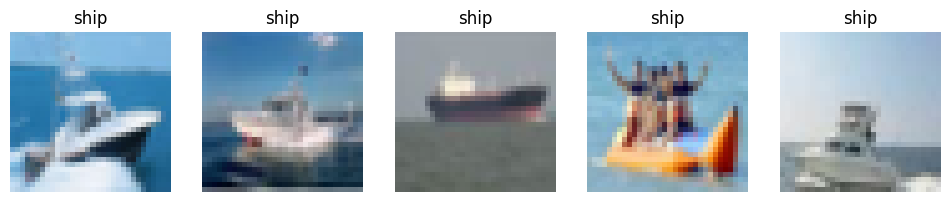

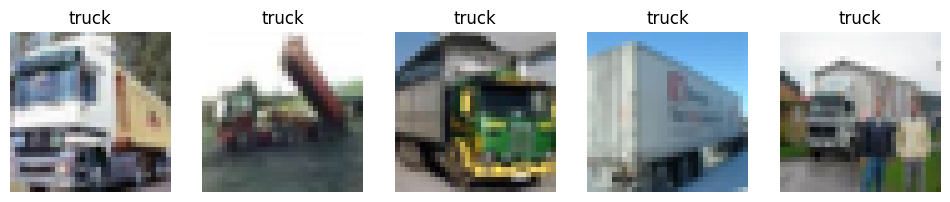

In [63]:
# Display example from each class for visualization

for class_idx in range(10):
    class_images = [img for img, label in dataset if label == class_idx][:5]
    show_images(class_images, [class_idx]*5, classes)


This code block generates samples from each class for visualization of the images. This process is generally slow and I prefer the previous method.

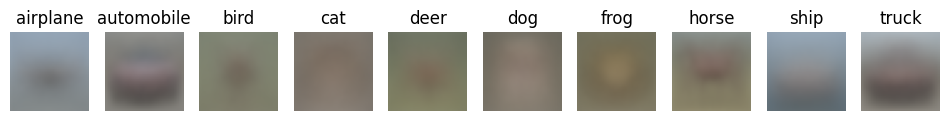

In [70]:
# Class-wise Mean Images
import torch
mean_images = torch.zeros((10, 3, 32, 32))
class_counts = torch.zeros(10)

for img, label in dataset:
    mean_images[label] += img
    class_counts[label] += 1

mean_images /= class_counts.view(-1, 1, 1, 1)
show_images(mean_images, range(10), classes)


This is a good visualization on the mean of each image. It may not be useful for myself but it was interesting to see and use this code.

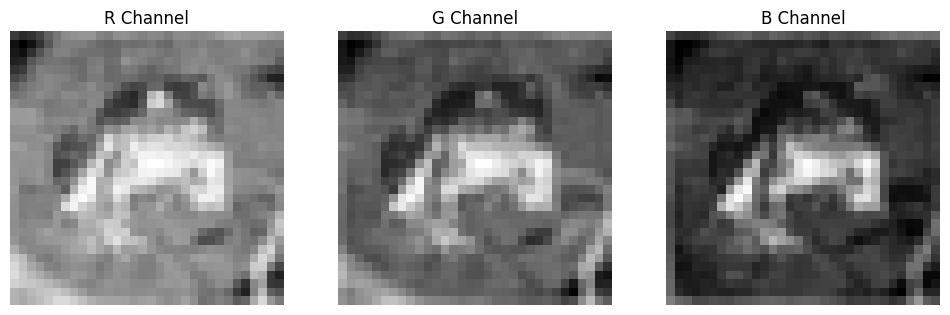

In [71]:
# RGB channel visualization
img = dataset[0][0]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i, color in enumerate(["R", "G", "B"]):
    axes[i].imshow(img[i], cmap="gray")
    axes[i].set_title(f"{color} Channel")
    axes[i].axis("off")
plt.show()


I could see this code being useful for seeing if preprocessing is needed.

In [72]:
# Step 4: Various analysis
def plot_pixel_distribution(images):
    # Flatten image pixels into a 1D array
    pixels = images.view(-1).numpy()
    plt.hist(pixels, bins=50, color='blue', alpha=0.7)
    plt.title("Pixel Value Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

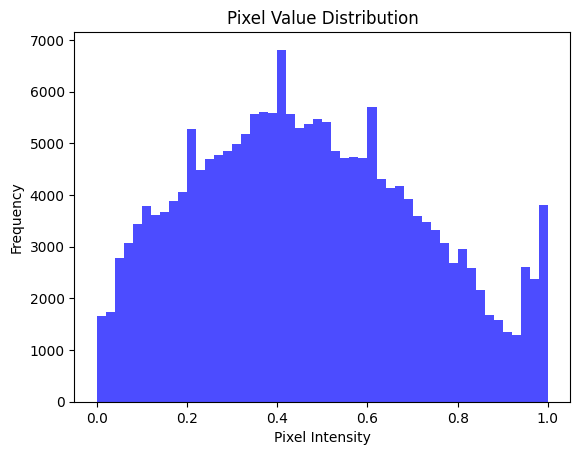

In [73]:
# Analyze pixel distribution for the first batch
plot_pixel_distribution(images)


This code creates a histogram of pixel density for batch of images. Running the dataiter a few times to get different batch, it seems like the data set could benefit from some normalization and standarization.

In [74]:
# Color Channel Correlations
correlations = []
for img, _ in dataset:
    img_flat = img.view(3, -1)
    corr = torch.corrcoef(img_flat)
    correlations.append(corr)
print("Example correlation matrix:\n", correlations[0])


Example correlation matrix:
 tensor([[1.0000, 0.9562, 0.8439],
        [0.9562, 1.0000, 0.8957],
        [0.8439, 0.8957, 1.0000]])


This code calculates the correlation matrix of the RGB channels for each image in the CIFAR-10 dataset by flattening the image into a 1D array and then computing the correlation between the color channels, storing the results in a list. The first correlation matrix is then printed as an example.

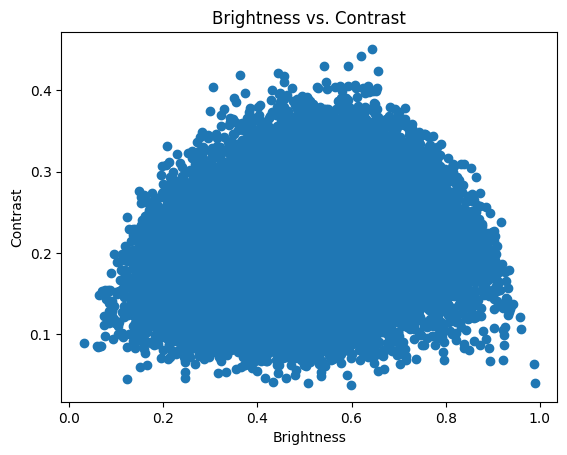

In [75]:
# Brightness/Contrass Analysis
brightness = [img.mean().item() for img, _ in dataset]
contrast = [img.std().item() for img, _ in dataset]
plt.scatter(brightness, contrast)
plt.xlabel("Brightness")
plt.ylabel("Contrast")
plt.title("Brightness vs. Contrast")
plt.show()


This code calculates the average brightness and standard deviation (contrast) for each image in the CIFAR-10 dataset, then plots a scatter plot of brightness vs. contrast for all images.

## Conclusion
This report was a good exercise in learning to use Pytorch for exploratory data analysis.